In [1]:
import models
import model_setup
import numpy as np
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import random_split, DataLoader
from tqdm import tqdm
from itertools import product
from datetime import datetime
from torchvision import transforms

# Setup data

In [2]:
# Load new dataset
dataset = model_setup.load_data(max_files=30_000)

# torch.save(dataset, "preprocessed_data_30_000.pt")

# # Load from preprocessed dataset
# preprocessed_data_path = "preprocessed_data_30_000.pt"

# # Load the data
# loaded_data = torch.load(preprocessed_data_path)

Processing Data: 100%|██████████| 30000/30000 [02:22<00:00, 210.16image/s]


Split the data into training, testing, and validation sets

In [3]:
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
train_subset, test_subset, val_subset = random_split(loader.dataset,[0.7,0.2,0.1])
val_size = len(val_subset.indices)
del loader

In [4]:
train_transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
            transforms.GaussianBlur(kernel_size=3),
            transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=15),
            transforms.ToTensor()
            # Add any additional preprocessing steps here
        ])

for idx in tqdm(train_subset.indices, total=len(train_subset.indices)):
    input, label = train_subset.dataset.data[idx]
    new_input = train_transform(input*255) /255
    train_subset.dataset.data[idx] = (new_input, label)



100%|██████████| 21000/21000 [05:10<00:00, 67.70it/s]


In [5]:
train = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test = DataLoader(test_subset,batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val = DataLoader(val_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

# Training

Make a parameter grid

In [6]:
param_grid = {
    'filters': [64, 128],
    'num_conv_layers': [4, 8]
}

# Get all combinations of parameters
combinations = list(product(*param_grid.values()))
combinations

[(64, 4), (64, 8), (128, 4), (128, 8)]

Train all combinations

In [7]:
saved_models = []

# for filters, num_layers in combinations:
#     print("--------------------------------------------------------")
#     print(f"Testing with \"{filters} filters\" and \"{num_layers} layers\"")
#     model = models.HandDetectionModel(filters, num_layers)
#     model.train_model(train, test, epochs=100, early_stopping_patience=10)
#     torch.save(model.state_dict(), f"models/model_{filters}_{num_layers}_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
#     saved_models.append(model)

model = models.HandDetectionModel()
training_info = model.train_model(train, test, epochs=50 , early_stopping_patience=10)
torch.save(model.state_dict(), "models/model_resnet50_with_full.pt")
saved_models.append(model)

Epoch 1/50 (Training): 100%|██████████| 329/329 [02:34<00:00,  2.13it/s]


Loss: 0.5335, Validation Accuracy: 0.7937, Full Accuracy: [0.9989969909729187, 0.7532795156407669, 0.6309288537549407], Time remaining: 2:18:16.275064


Epoch 2/50 (Training): 100%|██████████| 329/329 [03:15<00:00,  1.68it/s]


Loss: 0.3090, Validation Accuracy: 0.8378, Full Accuracy: [0.9984954864593781, 0.858728557013118, 0.6590909090909091], Time remaining: 2:31:57.756960


Epoch 3/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.1866, Validation Accuracy: 0.8595, Full Accuracy: [0.9979939819458375, 0.7356205852674067, 0.8443675889328063], Time remaining: 2:35:35.998079


Epoch 4/50 (Training): 100%|██████████| 329/329 [03:19<00:00,  1.65it/s]


Loss: 0.1085, Validation Accuracy: 0.8650, Full Accuracy: [0.9984954864593781, 0.8032290615539859, 0.7939723320158103], Time remaining: 2:35:19.352980


Epoch 5/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0617, Validation Accuracy: 0.8700, Full Accuracy: [0.9979939819458375, 0.7956609485368314, 0.816699604743083], Time remaining: 2:34:18.910290


Epoch 6/50 (Training): 100%|██████████| 329/329 [03:20<00:00,  1.64it/s]


Loss: 0.0466, Validation Accuracy: 0.8670, Full Accuracy: [0.9994984954864594, 0.7699293642785066, 0.8315217391304348], Time remaining: 2:32:00.549416


Epoch 7/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0382, Validation Accuracy: 0.8723, Full Accuracy: [0.9974924774322969, 0.7815338042381433, 0.8379446640316206], Time remaining: 2:29:30.875344


Epoch 8/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0391, Validation Accuracy: 0.8707, Full Accuracy: [0.9979939819458375, 0.8905146316851665, 0.7257905138339921], Time remaining: 2:26:49.382988


Epoch 9/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0361, Validation Accuracy: 0.8782, Full Accuracy: [0.9974924774322969, 0.8390514631685166, 0.7989130434782609], Time remaining: 2:23:52.299080


Epoch 10/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0282, Validation Accuracy: 0.8743, Full Accuracy: [0.9964894684052157, 0.739656912209889, 0.8858695652173914], Time remaining: 2:20:50.488120


Epoch 11/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0325, Validation Accuracy: 0.8813, Full Accuracy: [0.9964894684052157, 0.8607467204843592, 0.7880434782608695], Time remaining: 2:17:38.082612


Epoch 12/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0210, Validation Accuracy: 0.8817, Full Accuracy: [0.9979939819458375, 0.8128153380423815, 0.8344861660079052], Time remaining: 2:14:20.564826


Epoch 13/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0246, Validation Accuracy: 0.8822, Full Accuracy: [0.995987963891675, 0.8662966700302724, 0.7855731225296443], Time remaining: 2:11:01.296797


Epoch 14/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0232, Validation Accuracy: 0.8803, Full Accuracy: [0.9974924774322969, 0.777497477295661, 0.8656126482213439], Time remaining: 2:07:37.711452


Epoch 15/50 (Training): 100%|██████████| 329/329 [03:19<00:00,  1.65it/s]


Loss: 0.0267, Validation Accuracy: 0.8787, Full Accuracy: [0.9969909729187563, 0.7542885973763875, 0.883893280632411], Time remaining: 2:04:09.313620


Epoch 16/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0094, Validation Accuracy: 0.8917, Full Accuracy: [0.9969909729187563, 0.8607467204843592, 0.8181818181818182], Time remaining: 2:00:43.424430


Epoch 17/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0043, Validation Accuracy: 0.8910, Full Accuracy: [0.9964894684052157, 0.8329969727547931, 0.8438735177865613], Time remaining: 1:57:17.245281


Epoch 18/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0021, Validation Accuracy: 0.8937, Full Accuracy: [0.9969909729187563, 0.8451059535822402, 0.8394268774703557], Time remaining: 1:53:49.395872


Epoch 19/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0011, Validation Accuracy: 0.8950, Full Accuracy: [0.995987963891675, 0.8693239152371343, 0.8206521739130435], Time remaining: 1:50:21.505295


Epoch 20/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0028, Validation Accuracy: 0.8920, Full Accuracy: [0.9969909729187563, 0.8647830474268415, 0.8152173913043478], Time remaining: 1:46:51.601230


Epoch 21/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0068, Validation Accuracy: 0.8842, Full Accuracy: [0.9964894684052157, 0.8713420787083754, 0.7860671936758893], Time remaining: 1:43:21.152679


Epoch 22/50 (Training): 100%|██████████| 329/329 [03:24<00:00,  1.61it/s]


Loss: 0.0102, Validation Accuracy: 0.8917, Full Accuracy: [0.9949849548645938, 0.8188698284561049, 0.8611660079051383], Time remaining: 1:39:54.172884


Epoch 23/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0043, Validation Accuracy: 0.8895, Full Accuracy: [0.995987963891675, 0.8077699293642785, 0.8646245059288538], Time remaining: 1:36:22.470336


Epoch 24/50 (Training): 100%|██████████| 329/329 [03:20<00:00,  1.64it/s]


Loss: 0.0011, Validation Accuracy: 0.8922, Full Accuracy: [0.9974924774322969, 0.8229061553985872, 0.8562252964426877], Time remaining: 1:32:49.834400


Epoch 25/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0005, Validation Accuracy: 0.8942, Full Accuracy: [0.9979939819458375, 0.8254288597376388, 0.8591897233201581], Time remaining: 1:29:18.351800


Epoch 26/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0003, Validation Accuracy: 0.8922, Full Accuracy: [0.9964894684052157, 0.8269424823410696, 0.8532608695652174], Time remaining: 1:25:46.552920


Epoch 27/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0003, Validation Accuracy: 0.8902, Full Accuracy: [0.9979939819458375, 0.7855701311806257, 0.8863636363636364], Time remaining: 1:22:14.614258


Epoch 28/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0011, Validation Accuracy: 0.8948, Full Accuracy: [0.9974924774322969, 0.8173562058526741, 0.8695652173913043], Time remaining: 1:18:42.676486


Epoch 29/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0008, Validation Accuracy: 0.8920, Full Accuracy: [0.9954864593781344, 0.8390514631685166, 0.841897233201581], Time remaining: 1:15:09.858906


Epoch 30/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.61it/s]


Loss: 0.0016, Validation Accuracy: 0.8937, Full Accuracy: [0.995987963891675, 0.8456104944500504, 0.8399209486166008], Time remaining: 1:11:37.645020


Epoch 31/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0010, Validation Accuracy: 0.8928, Full Accuracy: [0.995987963891675, 0.8456104944500504, 0.8374505928853755], Time remaining: 1:08:03.738419


Epoch 32/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0002, Validation Accuracy: 0.8953, Full Accuracy: [0.995987963891675, 0.8193743693239153, 0.8705533596837944], Time remaining: 1:04:29.914086


Epoch 33/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0004, Validation Accuracy: 0.8940, Full Accuracy: [0.9974924774322969, 0.8239152371342079, 0.8606719367588933], Time remaining: 1:00:55.610725


Epoch 34/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0001, Validation Accuracy: 0.8957, Full Accuracy: [0.9964894684052157, 0.8405650857719476, 0.8502964426877471], Time remaining: 0:57:21.649120


Epoch 35/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0001, Validation Accuracy: 0.8987, Full Accuracy: [0.9969909729187563, 0.8375378405650857, 0.8616600790513834], Time remaining: 0:53:47.773170


Epoch 36/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0002, Validation Accuracy: 0.8927, Full Accuracy: [0.9974924774322969, 0.8496468213925328, 0.8315217391304348], Time remaining: 0:50:13.235274


Epoch 37/50 (Training): 100%|██████████| 329/329 [03:19<00:00,  1.65it/s]


Loss: 0.0001, Validation Accuracy: 0.8955, Full Accuracy: [0.9989969909729187, 0.8597376387487387, 0.8285573122529645], Time remaining: 0:46:37.825446


Epoch 38/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0001, Validation Accuracy: 0.8937, Full Accuracy: [0.9969909729187563, 0.8592330978809284, 0.825592885375494], Time remaining: 0:43:02.895000


Epoch 39/50 (Training): 100%|██████████| 329/329 [03:24<00:00,  1.61it/s]


Loss: 0.0001, Validation Accuracy: 0.8952, Full Accuracy: [0.9969909729187563, 0.8572149344096872, 0.8320158102766798], Time remaining: 0:39:28.706923


Epoch 40/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.64it/s]


Loss: 0.0002, Validation Accuracy: 0.8972, Full Accuracy: [0.9974924774322969, 0.8415741675075681, 0.8527667984189723], Time remaining: 0:35:53.444260


Epoch 41/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0004, Validation Accuracy: 0.8968, Full Accuracy: [0.9979939819458375, 0.8466195761856711, 0.8463438735177866], Time remaining: 0:32:18.578976


Epoch 42/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0001, Validation Accuracy: 0.8937, Full Accuracy: [0.9984954864593781, 0.858728557013118, 0.8246047430830039], Time remaining: 0:28:43.386392


Epoch 43/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0003, Validation Accuracy: 0.8922, Full Accuracy: [0.995987963891675, 0.7870837537840565, 0.8927865612648221], Time remaining: 0:25:08.102694


Epoch 44/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0001, Validation Accuracy: 0.8942, Full Accuracy: [0.9984954864593781, 0.8072653884964682, 0.8764822134387352], Time remaining: 0:21:32.761506


Epoch 45/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0001, Validation Accuracy: 0.8952, Full Accuracy: [0.9984954864593781, 0.813824419778002, 0.8730237154150198], Time remaining: 0:17:57.519890


Epoch 46/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0000, Validation Accuracy: 0.8963, Full Accuracy: [0.9984954864593781, 0.834510595358224, 0.8562252964426877], Time remaining: 0:14:22.139276


Epoch 47/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0000, Validation Accuracy: 0.8950, Full Accuracy: [0.9974924774322969, 0.8128153380423815, 0.8745059288537549], Time remaining: 0:10:46.674195


Epoch 48/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0001, Validation Accuracy: 0.8967, Full Accuracy: [0.9984954864593781, 0.8289606458123108, 0.8626482213438735], Time remaining: 0:07:11.210232


Epoch 49/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0000, Validation Accuracy: 0.8988, Full Accuracy: [0.9979939819458375, 0.8365287588294652, 0.8621541501976284], Time remaining: 0:03:35.622899
Early stopping at epoch 49 due to no improvement in validation loss.
Best Validation Loss: 0.0001 at epoch 39


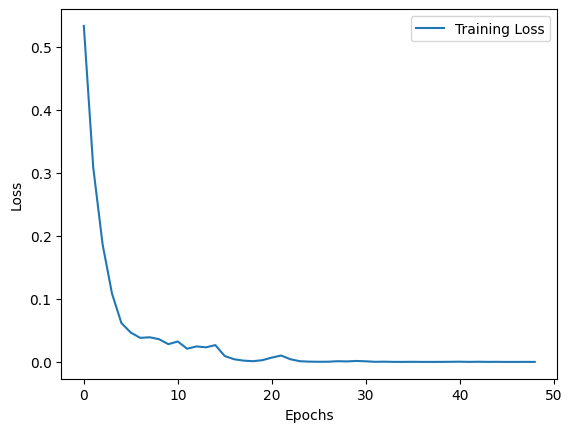

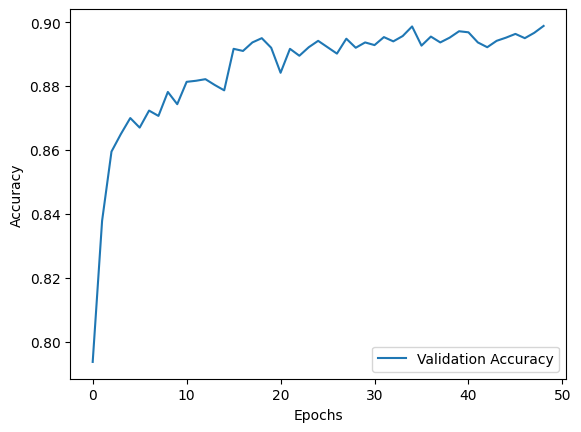

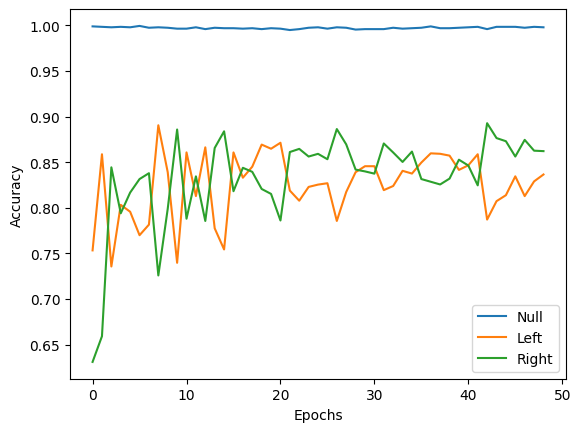

In [8]:
# Plot loss and accuracy
# Plot training loss
plt.plot(training_info['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(training_info['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot full accuracy
full_acc_array = np.array(training_info['full_acc']).T  # Transpose for easy plotting
labels = ['Null', 'Left', 'Right']
for i in range(3):
    plt.plot(full_acc_array[i], label=labels[i])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Validation

--------------------------------------------------------
Validating with "4 filters" and "64 layers"


Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Evaluating: 100%|██████████| 94/94 [00:09<00:00,  9.58it/s]


Accuracy: 90.03%


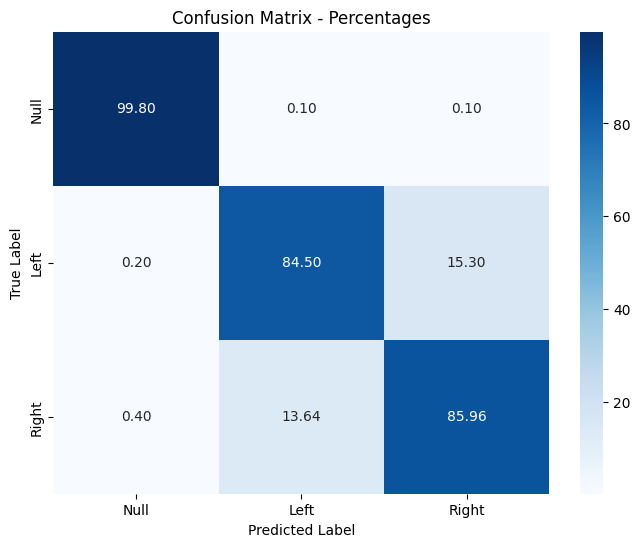

In [9]:
class_labels = [0, 1, 2]
for idx, model in enumerate(saved_models):
    num_layers, filters = combinations[idx]
    print("--------------------------------------------------------")
    print(f"Validating with \"{filters} filters\" and \"{num_layers} layers\"")
    with torch.no_grad():
        correct_predictions = 0
        true_labels = []
        predicted_labels = []
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Wrap the loop with tqdm to add a progress bar
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())

            for idx, output in enumerate(outputs):
                predicted_label = torch.argmax(output)
                predicted_labels.append(predicted_label.item())

                # print(f"True Label: {labels[idx]}, Predicted Label: {predicted_label.item()}")

                if predicted_label.item() == labels[idx]:
                    correct_predictions += 1

        accuracy = correct_predictions / val_size
        print(f"Accuracy: {accuracy * 100:.2f}%")

    # Convert true and predicted labels to numpy arrays
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)


    # Create confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

    # Normalize the confusion matrix to get percentages
    conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Null", "Left", "Right"], yticklabels=["Null", "Left", "Right"])
    plt.title('Confusion Matrix - Percentages')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [10]:
from PIL import Image
from os import listdir
import torch.nn.functional as F

image_head = "../images/"
paths = listdir(image_head)

transform = transforms.Compose({
    transforms.Resize((224, 224)),
    transforms.ToTensor()
})

for path in paths:
    image = Image.open(image_head+path)
    image = transform(image) / 255
    output = model(torch.stack([image]).to(device))
    print(torch.argmax(output),F.softmax(output, dim=1).tolist())

/home/devcontainers/miniconda3/envs/typ/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor(2, device='cuda:0') [[0.3758293092250824, 0.0008765525999478996, 0.6232941746711731]]
tensor(2, device='cuda:0') [[0.00032663645106367767, 0.0002452752960380167, 0.9994279742240906]]
tensor(2, device='cuda:0') [[0.0011962645221501589, 0.0002462571719661355, 0.9985575079917908]]
tensor(2, device='cuda:0') [[0.0009108562953770161, 0.006925244815647602, 0.992163896560669]]
tensor(2, device='cuda:0') [[3.68491091649048e-05, 4.096579687029589e-06, 0.9999591112136841]]
tensor(2, device='cuda:0') [[0.39519014954566956, 0.10066602379083633, 0.5041437745094299]]
tensor(0, device='cuda:0') [[0.9992782473564148, 2.225378375442233e-05, 0.0006994982250034809]]
tensor(0, device='cuda:0') [[0.9979107975959778, 0.00010196871880907565, 0.0019872765988111496]]
tensor(1, device='cuda:0') [[0.06066901236772537, 0.9382565021514893, 0.0010745268082246184]]
tensor(2, device='cuda:0') [[9.8981963674305e-06, 6.151426532596815e-07, 0.9999895095825195]]
tensor(0, device='cuda:0') [[0.9902140498161316, 4.7